In [11]:
! pip install nltk

In [12]:
! pip install GetOldTweets3

In [13]:
import string
from collections import Counter
import matplotlib.pyplot as plt

In [14]:
def get_tweets():
    import GetOldTweets3 as got # library used to scrap the data from twitter 
    tweetCriteria = got.manager.TweetCriteria().setQuerySearch('Coronavirus') \
        .setSince("2020-04-01") \
        .setUntil("2020-05-31") \
        .setMaxTweets(100)
        
    tweets = got.manager.TweetManager.getTweets(tweetCriteria)
    
    text_tweets = [[tweet.text] for tweet in tweets]
    return text_tweets
         
    
    

In [15]:
# reading the text_file

text = ""

text_tweets = get_tweets()
length = len(text_tweets)

for i in range(0 , length):
    text  = text_tweets[i][0] + " " + text
    
# converting to lower case
lower_case = text.lower()

# remove puctuation

cleaned_text = lower_case.translate(str.maketrans('', '', string.punctuation))

# splitting text into words

tokenized_words = cleaned_text.split()

In [16]:
text_tweets

[['Legislators may have a pandemic business interruption insurance solution — but it almost certainly won’t help hoteliers currently struggling due to coronavirus-related drops in travel. '],
 ['Alerta genera el contagio de tres trabajadores por coronavirus en Quemchi https://bit.ly/3djBeWa'],
 ['#Noticias24Siete Confirman brote de Coronavirus en Hospital General de #Reynosa, hay 23 contagiados #Tamaulipas'],
 ['Lol, they showed one of my tweets on Italian television! (I was being sarcastic about popular Italian singer #AlBano, who said “we were able to destroy dinosaurs, we can win coronavirus!” ) '],
 ['I wonder if there will be a spike in coronavirus in Colorado! '],
 ['Not coronavirus '],
 ['#SantaFe | Dos casos nuevos confirmados de #coronavirus en la provincia ▼ https://bit.ly/3ckmfty'],
 ['Crianças reproduzem dança feita pela campeã mundial de esgrima em Paris: "Muita emoção" | coronavírus | Globoesporte '],
 ['Coronavirus: Brasil ya es el cuarto país con más muertos en el mundo

In [17]:
from nltk.corpus import stopwords


In [18]:
import nltk
nltk.download('stopwords')
final_words = []

for word in tokenized_words:
    if word not in stopwords.words('english'):
        final_words.append(word)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\tarun\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [19]:
emotion_list = []
with open('emotions.txt', 'r' ) as file:
    for line in file:
        clear_lines = line.replace('\n', '').replace(',','').replace("'", '').strip()
        word , emotion = clear_lines.split(':')
        if word in final_words:
            emotion_list.append(emotion)
            
w = Counter(emotion_list)
print(w)
        

Counter({' sad': 2, ' attracted': 1, ' adequate': 1})


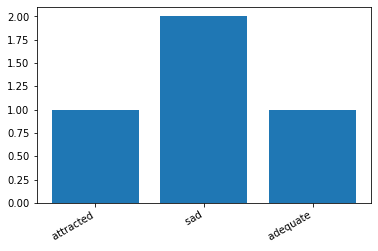

In [20]:
fig , ax1 = plt.subplots()
ax1.bar(w.keys(), w.values())
fig.autofmt_xdate()
plt.savefig('graph.png')
plt.show()